<a href="https://colab.research.google.com/github/vjlakshmi321/ai-050/blob/main/Project_KPIPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
data = pd.read_csv('KPI_Data.csv')
data.head(20)

,PERIOD_START_TIME,PLMN Name,DN,RRC Setup Success Rate (VFG),RRC Setup Success Rate (VFG)-Nom,RRC Attempt,RRC Setup Success Rate (VFG)-Denom,Latency,SIGN_CONN_ESTAB_COMP,SIGN_CONN_ESTAB_ATT_MO_S,...,ERAB_REL_ENB_RNL_RED_QCI1,ENB_EPS_BEAR_REL_REQ_T_QCI1,ERAB_REL_ENB_TNL_UNSP_QCI1,ERAB_REL_TEMP_QCI1,EPC_EPS_BEAR_REL_REQ_N_QCI1,EPC_EPS_BEAR_REL_REQ_R_QCI1,ENB_EPS_BEAR_REL_REQ_R_QCI1,ENB_EPS_BEAR_REL_REQ_O_QCI1,ENB_EPS_BEAR_REL_REQ_RD_QCI1,ENB_EPS_BEAR_REL_REQ_N_QCI1
0,04-Apr-2022,PLMN,PLMN-PLMN,99.72636,32688191,32688191,32777885,0.102600,35210324,2590971,...,432,NaN,5,0,538677,8379,NaN,NaN,NaN,NaN
1,05-Apr-2022,PLMN,PLMN-PLMN,99.90934,33829173,#DIV/0,33859872,7.582319,36492626,2727148,...,527,NaN,9,0,538625,8650,NaN,NaN,NaN,NaN
2,04.06.2022,PLMN,PLMN-PLMN,99.91123,33193004,#DIV/0,33222497,8.062100,35913136,2783825,...,502,NaN,4,0,522837,8551,NaN,NaN,NaN,NaN
3,04.07.2022,PLMN,PLMN-PLMN,99.02174,33019910,#DIV/0,33346122,5.727682,35737211,2789558,...,454,NaN,1,0,530109,8110,NaN,NaN,NaN,NaN
4,04.08.2022,PLMN,PLMN-PLMN,99.91109,32926719,#DIV/0,32956019,NaN,35546825,2679900,...,472,NaN,4,0,535714,7313,NaN,NaN,NaN,NaN
5,04.09.2022,PLMN,PLMN-PLMN,99.92269,28936889,#DIV/0,28959277,0.749464,31309882,2421033,...,247,NaN,3,0,375799,4529,NaN,NaN,NaN,NaN
6,04.10.2022,PLMN,PLMN-PLMN,99.92450,27934570,#DIV/0,27955676,3.184124,30220143,2335668,...,195,NaN,2,0,325661,4001,NaN,NaN,NaN,NaN
7,04.11.2022,PLMN,PLMN-PLMN,99.91048,32073115,#DIV/0,32101851,1.494049,34700024,2687141,...,454,NaN,1,0,539461,7612,NaN,NaN,NaN,NaN
8,04.12.2022,PLMN,PLMN-PLMN,99.90699,33256676,#DIV/0,33287636,0.655603,35911763,2715603,...,534,NaN,1,0,539179,7514,NaN,NaN,NaN,NaN
9,04.13.2022,PLMN,PLMN-PLMN,99.90191,33477361,#DIV/0,33510230,4.504824,36124456,2710161,...,563,NaN,7,0,556784,8284,NaN,NaN,NaN,NaN


In [113]:
#Changing date column to uniform format
data['PERIOD_START_TIME'] = data['PERIOD_START_TIME'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))
data.head(20)

,PERIOD_START_TIME,PLMN Name,DN,RRC Setup Success Rate (VFG),RRC Setup Success Rate (VFG)-Nom,RRC Attempt,RRC Setup Success Rate (VFG)-Denom,Latency,SIGN_CONN_ESTAB_COMP,SIGN_CONN_ESTAB_ATT_MO_S,...,ERAB_REL_ENB_RNL_RED_QCI1,ENB_EPS_BEAR_REL_REQ_T_QCI1,ERAB_REL_ENB_TNL_UNSP_QCI1,ERAB_REL_TEMP_QCI1,EPC_EPS_BEAR_REL_REQ_N_QCI1,EPC_EPS_BEAR_REL_REQ_R_QCI1,ENB_EPS_BEAR_REL_REQ_R_QCI1,ENB_EPS_BEAR_REL_REQ_O_QCI1,ENB_EPS_BEAR_REL_REQ_RD_QCI1,ENB_EPS_BEAR_REL_REQ_N_QCI1
0,04/04/2022,PLMN,PLMN-PLMN,99.72636,32688191,32688191,32777885,0.102600,35210324,2590971,...,432,NaN,5,0,538677,8379,NaN,NaN,NaN,NaN
1,04/05/2022,PLMN,PLMN-PLMN,99.90934,33829173,#DIV/0,33859872,7.582319,36492626,2727148,...,527,NaN,9,0,538625,8650,NaN,NaN,NaN,NaN
2,04/06/2022,PLMN,PLMN-PLMN,99.91123,33193004,#DIV/0,33222497,8.062100,35913136,2783825,...,502,NaN,4,0,522837,8551,NaN,NaN,NaN,NaN
3,04/07/2022,PLMN,PLMN-PLMN,99.02174,33019910,#DIV/0,33346122,5.727682,35737211,2789558,...,454,NaN,1,0,530109,8110,NaN,NaN,NaN,NaN
4,04/08/2022,PLMN,PLMN-PLMN,99.91109,32926719,#DIV/0,32956019,NaN,35546825,2679900,...,472,NaN,4,0,535714,7313,NaN,NaN,NaN,NaN
5,04/09/2022,PLMN,PLMN-PLMN,99.92269,28936889,#DIV/0,28959277,0.749464,31309882,2421033,...,247,NaN,3,0,375799,4529,NaN,NaN,NaN,NaN
6,04/10/2022,PLMN,PLMN-PLMN,99.92450,27934570,#DIV/0,27955676,3.184124,30220143,2335668,...,195,NaN,2,0,325661,4001,NaN,NaN,NaN,NaN
7,04/11/2022,PLMN,PLMN-PLMN,99.91048,32073115,#DIV/0,32101851,1.494049,34700024,2687141,...,454,NaN,1,0,539461,7612,NaN,NaN,NaN,NaN
8,04/12/2022,PLMN,PLMN-PLMN,99.90699,33256676,#DIV/0,33287636,0.655603,35911763,2715603,...,534,NaN,1,0,539179,7514,NaN,NaN,NaN,NaN
9,04/13/2022,PLMN,PLMN-PLMN,99.90191,33477361,#DIV/0,33510230,4.504824,36124456,2710161,...,563,NaN,7,0,556784,8284,NaN,NaN,NaN,NaN


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 99 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PERIOD_START_TIME                           727 non-null    object 
 1   PLMN Name                                   727 non-null    object 
 2   DN                                          727 non-null    object 
 3   RRC Setup Success Rate (VFG)                727 non-null    float64
 4   RRC Setup Success Rate (VFG)-Nom            727 non-null    int64  
 5   RRC Attempt                                 711 non-null    object 
 6   RRC Setup Success Rate (VFG)-Denom          727 non-null    int64  
 7   Latency                                     714 non-null    float64
 8   SIGN_CONN_ESTAB_COMP                        727 non-null    int64  
 9   SIGN_CONN_ESTAB_ATT_MO_S                    727 non-null    int64  
 10  NR_Total_UL_BL

In [115]:
#Removing columns which has blank values
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 91 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PERIOD_START_TIME                           727 non-null    object 
 1   PLMN Name                                   727 non-null    object 
 2   DN                                          727 non-null    object 
 3   RRC Setup Success Rate (VFG)                727 non-null    float64
 4   RRC Setup Success Rate (VFG)-Nom            727 non-null    int64  
 5   RRC Attempt                                 711 non-null    object 
 6   RRC Setup Success Rate (VFG)-Denom          727 non-null    int64  
 7   Latency                                     714 non-null    float64
 8   SIGN_CONN_ESTAB_COMP                        727 non-null    int64  
 9   SIGN_CONN_ESTAB_ATT_MO_S                    727 non-null    int64  
 10  NR_Total_UL_BL

In [116]:
#Replacing error values to nan
data = data.replace('#DIV/0', np.nan)
data = data.replace('N/A', np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 91 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PERIOD_START_TIME                           727 non-null    object 
 1   PLMN Name                                   727 non-null    object 
 2   DN                                          727 non-null    object 
 3   RRC Setup Success Rate (VFG)                727 non-null    float64
 4   RRC Setup Success Rate (VFG)-Nom            727 non-null    int64  
 5   RRC Attempt                                 597 non-null    object 
 6   RRC Setup Success Rate (VFG)-Denom          727 non-null    int64  
 7   Latency                                     714 non-null    float64
 8   SIGN_CONN_ESTAB_COMP                        727 non-null    int64  
 9   SIGN_CONN_ESTAB_ATT_MO_S                    727 non-null    int64  
 10  NR_Total_UL_BL

In [117]:
data.head(20)

,PERIOD_START_TIME,PLMN Name,DN,RRC Setup Success Rate (VFG),RRC Setup Success Rate (VFG)-Nom,RRC Attempt,RRC Setup Success Rate (VFG)-Denom,Latency,SIGN_CONN_ESTAB_COMP,SIGN_CONN_ESTAB_ATT_MO_S,...,ERAB_REL_ENB_RNL_EUGR_QCI1,ERAB_REL_ENB_RNL_RRNA_QCI1,ERAB_REL_HO_FAIL_TIM_QCI1,ERAB_REL_ENB_QCI1,ERAB_REL_ENB_RNL_INA_QCI1,ERAB_REL_ENB_RNL_RED_QCI1,ERAB_REL_ENB_TNL_UNSP_QCI1,ERAB_REL_TEMP_QCI1,EPC_EPS_BEAR_REL_REQ_N_QCI1,EPC_EPS_BEAR_REL_REQ_R_QCI1
0,04/04/2022,PLMN,PLMN-PLMN,99.72636,32688191,32688191,32777885,0.102600,35210324,2590971,...,0,0,535,24321,22552,432,5,0,538677,8379
1,04/05/2022,PLMN,PLMN-PLMN,99.90934,33829173,NaN,33859872,7.582319,36492626,2727148,...,0,0,629,25683,23697,527,9,0,538625,8650
2,04/06/2022,PLMN,PLMN-PLMN,99.91123,33193004,NaN,33222497,8.062100,35913136,2783825,...,0,0,503,25209,23420,502,4,0,522837,8551
3,04/07/2022,PLMN,PLMN-PLMN,99.02174,33019910,NaN,33346122,5.727682,35737211,2789558,...,0,0,543,24538,22782,454,1,0,530109,8110
4,04/08/2022,PLMN,PLMN-PLMN,99.91109,32926719,NaN,32956019,NaN,35546825,2679900,...,0,0,419,23581,21893,472,4,0,535714,7313
5,04/09/2022,PLMN,PLMN-PLMN,99.92269,28936889,NaN,28959277,0.749464,31309882,2421033,...,0,0,333,15906,14799,247,3,0,375799,4529
6,04/10/2022,PLMN,PLMN-PLMN,99.92450,27934570,NaN,27955676,3.184124,30220143,2335668,...,0,0,266,13546,12662,195,2,0,325661,4001
7,04/11/2022,PLMN,PLMN-PLMN,99.91048,32073115,NaN,32101851,1.494049,34700024,2687141,...,0,0,549,24553,22842,454,1,0,539461,7612
8,04/12/2022,PLMN,PLMN-PLMN,99.90699,33256676,NaN,33287636,0.655603,35911763,2715603,...,0,0,529,24189,22348,534,1,0,539179,7514
9,04/13/2022,PLMN,PLMN-PLMN,99.90191,33477361,NaN,33510230,4.504824,36124456,2710161,...,0,0,557,26506,24600,563,7,0,556784,8284


In [118]:
#Removing unwanted columns
del data['RRC Attempt'],data['Latency'],data['NR_Total_UL_BLER'],data['DN']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PERIOD_START_TIME                           727 non-null    object 
 1   PLMN Name                                   727 non-null    object 
 2   RRC Setup Success Rate (VFG)                727 non-null    float64
 3   RRC Setup Success Rate (VFG)-Nom            727 non-null    int64  
 4   RRC Setup Success Rate (VFG)-Denom          727 non-null    int64  
 5   SIGN_CONN_ESTAB_COMP                        727 non-null    int64  
 6   SIGN_CONN_ESTAB_ATT_MO_S                    727 non-null    int64  
 7   SIGN_CONN_ESTAB_ATT_MT                      727 non-null    int64  
 8   SIGN_CONN_ESTAB_ATT_MO_D                    727 non-null    int64  
 9   SIGN_CONN_ESTAB_ATT_EMG                     727 non-null    int64  
 10  SIGN_CONN_ESTA

In [121]:
grouped_by_date_dcr = data.groupby('PERIOD_START_TIME').agg({
    'RadioBearerDropRate': 'mean'
})
grouped_by_date_dcr.reset_index(inplace=True)
grouped_by_date_dcr.head()


,PERIOD_START_TIME,RadioBearerDropRate
0,01/01/2023,0.03431
1,01/01/2024,0.04853
2,01/02/2023,0.03591
3,01/02/2024,0.05285
4,01/03/2023,0.03885


In [122]:
# let's set our datetime stamp to handle time-series sampling
grouped_by_date_dcr.sort_index(inplace=True)
grouped_by_date_dcr['PERIOD_START_TIME'] = pd.to_datetime(grouped_by_date_dcr['PERIOD_START_TIME'])
grouped_by_date_dcr.set_index('PERIOD_START_TIME',inplace=True)
grouped_by_date_dcr.head()

,RadioBearerDropRate
PERIOD_START_TIME,
2023-01-01,0.03431
2024-01-01,0.04853
2023-01-02,0.03591
2024-01-02,0.05285
2023-01-03,0.03885


In [126]:
# now calculate the average drop rate
#y = grouped_by_date_dcr['RadioBearerDropRate'].resample('D').mean()
y = grouped_by_date_dcr['RadioBearerDropRate'].resample('D').mean()

<Axes: xlabel='PERIOD_START_TIME'>

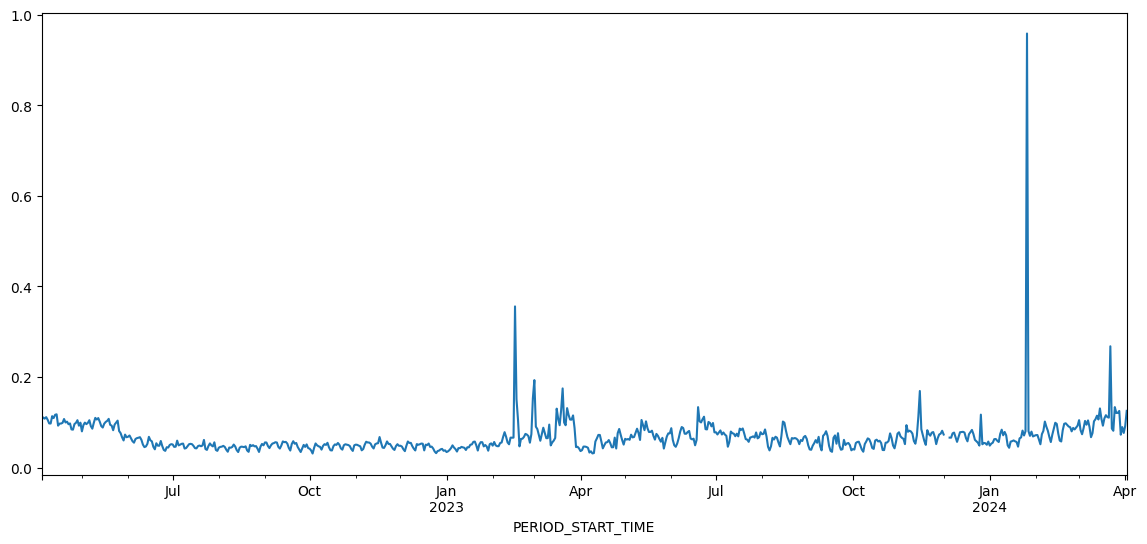

In [127]:
y.plot(figsize=(14,6))

In [128]:
!pip install statsmodels


                                SARIMAX Results                                
Dep. Variable:     RadioBearerDropRate   No. Observations:                  730
Model:                  ARIMA(1, 1, 1)   Log Likelihood                1323.499
Date:                 Fri, 05 Apr 2024   AIC                          -2640.998
Time:                         07:44:18   BIC                          -2627.223
Sample:                     04-04-2022   HQIC                         -2635.683
                          - 04-02-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1098      0.023      4.701      0.000       0.064       0.156
ma.L1         -0.9361      0.020    -47.008      0.000      -0.975      -0.897
sigma2         0.0015   5.88e-06    259.034 

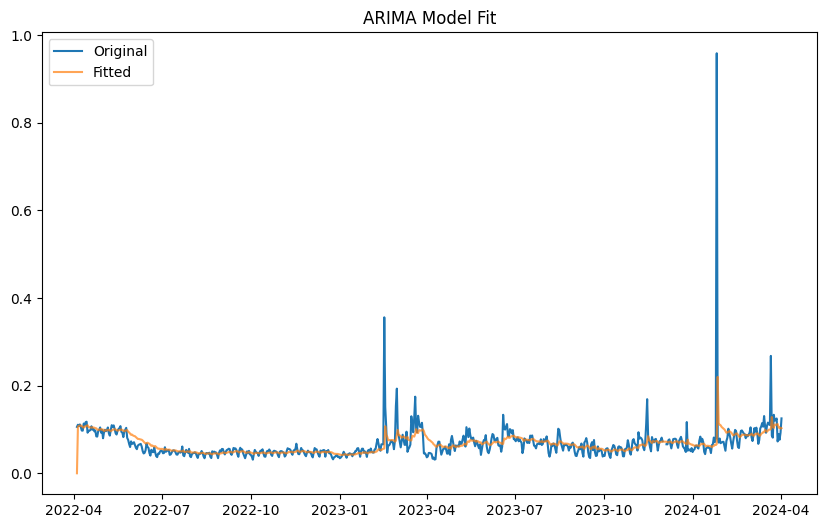

In [129]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model (using placeholder hyperparameters p=1, d=1, q=1)
# p,d,q = (1,1,1) = consider all 3:
# Autoregression, difference calculation and moving average
model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original')
plt.plot(model_fit.predict(), label='Fitted', alpha=0.7)
plt.legend()
plt.title('ARIMA Model Fit')
plt.show()


                                SARIMAX Results                                
Dep. Variable:     RadioBearerDropRate   No. Observations:                  730
Model:                  ARIMA(1, 0, 1)   Log Likelihood                1324.581
Date:                 Fri, 05 Apr 2024   AIC                          -2641.161
Time:                         07:44:24   BIC                          -2622.789
Sample:                     04-04-2022   HQIC                         -2634.073
                          - 04-02-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0710      0.016      4.328      0.000       0.039       0.103
ar.L1          0.9785      0.022     43.740      0.000       0.935       1.022
ma.L1         -0.8861      0.029    -30.384 

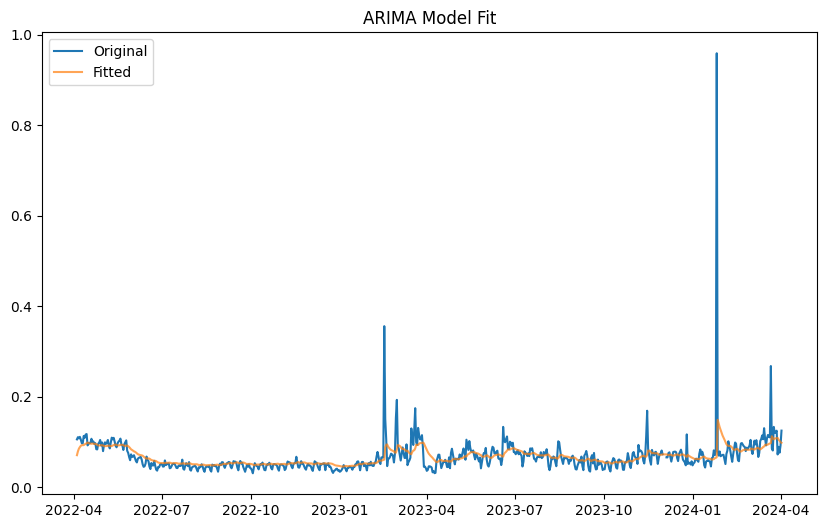

In [130]:
# ARIMA Model (using placeholder hyperparameters p=1, d=0, q=1)
# p,d,q = (1,0,1) = Autoregression with moving average, no difference calculation
model = ARIMA(y, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())
# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original')
plt.plot(model_fit.predict(), label='Fitted', alpha=0.7)
plt.legend()
plt.title('ARIMA Model Fit')
plt.show()

                                SARIMAX Results                                
Dep. Variable:     RadioBearerDropRate   No. Observations:                  730
Model:                  ARIMA(1, 1, 0)   Log Likelihood                1215.794
Date:                 Fri, 05 Apr 2024   AIC                          -2427.587
Time:                         07:44:51   BIC                          -2418.404
Sample:                     04-04-2022   HQIC                         -2424.044
                          - 04-02-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4519      0.004   -122.052      0.000      -0.459      -0.445
sigma2         0.0021   1.01e-05    202.405      0.000       0.002       0.002
Ljung-Box (L1) (Q):                  14.48  

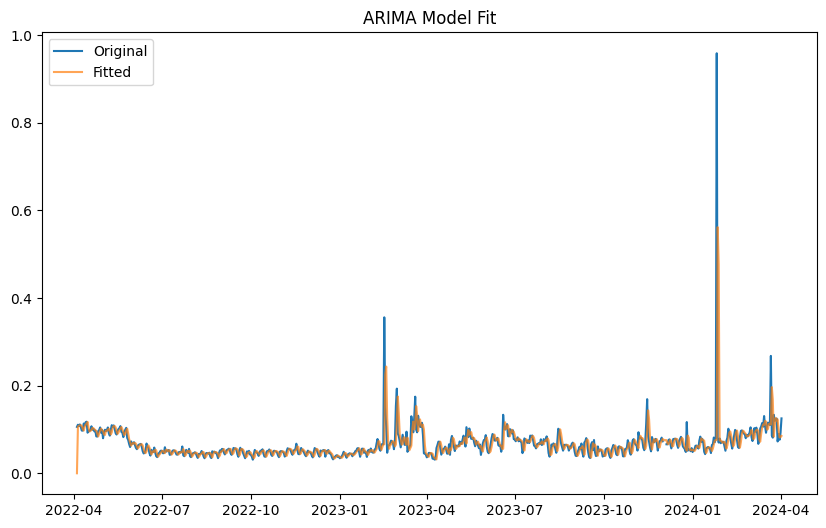

In [132]:
# ARIMA Model (using placeholder hyperparameters p=1, d=1, q=0)
# p,d,q = (1,1,0) = Autoregression with differences, no moving avg calculation
model = ARIMA(y, order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original')
plt.plot(model_fit.predict(), label='Fitted', alpha=0.7)
plt.legend()
plt.title('ARIMA Model Fit')
plt.show()